In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
! kaggle datasets download -d alsaniipe/chest-x-ray-image

100% 2.05G/2.06G [01:10<00:00, 39.5MB/s]
100% 2.06G/2.06G [01:10<00:00, 31.5MB/s]


In [ ]:
import zipfile

# Unzip the archive
local_zip = '/content/chest-x-ray-image.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

# GitHub repo link: https://github.com/also9275/dtsa5511_final_project

# Step 1. Gather data, determine the method of data collection and provenance of the data

For the final exam I've decided to try another computer vision problem because I found that this topic is really interesting to me. Also I've decided to try multi-class classification as we already have simple Yes/No classification on Week 3 in this course.

For the dataset I found this on Kaggle - https://www.kaggle.com/datasets/alsaniipe/chest-x-ray-image/data. I love the idea that DNN can be used for tasks like this.

Dataset is a set of CT images of patients diagnosed with different viral and bacterial pneumonias (MERS, SARS, ARDS) and COVID-19. Dataset has two folders:
 - train: that has folders for COVID19, NORMAL and Pneumonia scans
 - test: that has that has folders for COVID19, NORMAL and Pneumonia scans. We will be using this folder for testing our model performance

# Step 2. Identify a Deep Learning Problem


Clearly that this problem is multi-class classification problem and we can use computer vision techniques to build the model. First we will start with raw images and try to stack together several Convolutional + MaxPooling layers. This will be base model and then we will try to improve the model performance by trying data augmentation and trasfer learning.

# Step 3. Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data

In [ ]:
# First let's explore how the data look like
base_dir = "/content/Data"

covid_dir = os.path.join(base_dir, "train", "COVID19")
normal_dir = os.path.join(base_dir, "train", "NORMAL")
pneumonia_dir = os.path.join(base_dir, "train", "PNEUMONIA")

test_covid_dir = os.path.join(base_dir, "test", "COVID19")
test_normal_dir = os.path.join(base_dir, "test", "NORMAL")
test_pneumonia_dir = os.path.join(base_dir, "test", "PNEUMONIA")

print('total training Covid19 images:', len(os.listdir(covid_dir)))
print('total training normal images:', len(os.listdir(normal_dir)))
print('total training pneumonia images:', len(os.listdir(pneumonia_dir)))


print('total testing Covid19 images:', len(os.listdir(test_covid_dir)))
print('total testing normal images:', len(os.listdir(test_normal_dir)))
print('total testing pneumonia images:', len(os.listdir(test_pneumonia_dir)))

covid_files = os.listdir(covid_dir)
print(covid_files[:10])

normal_files = os.listdir(normal_dir)
print(normal_files[:10])

pneumonia_files = os.listdir(pneumonia_dir)
print(pneumonia_files[:10])

total training Covid19 images: 460
total training normal images: 1266
total training pneumonia images: 3418
total testing Covid19 images: 116
total testing normal images: 317
total testing pneumonia images: 855
['COVID19(227).jpg', 'COVID19(96).jpg', 'COVID19(88).jpg', 'COVID19(171).jpg', 'COVID19(204).jpg', 'COVID19(194).jpg', 'COVID19(385).jpg', 'COVID19(412).jpg', 'COVID19(142).jpg', 'COVID19(225).jpg']
['NORMAL(110).jpg', 'NORMAL(492).jpg', 'NORMAL(298).jpg', 'NORMAL(10).jpg', 'NORMAL(284).jpg', 'NORMAL(650).jpg', 'NORMAL(355).jpg', 'NORMAL(988).jpg', 'NORMAL(713).jpg', 'NORMAL(960).jpg']
['PNEUMONIA(2327).jpg', 'PNEUMONIA(1928).jpg', 'PNEUMONIA(1926).jpg', 'PNEUMONIA(3328).jpg', 'PNEUMONIA(1168).jpg', 'PNEUMONIA(1540).jpg', 'PNEUMONIA(551).jpg', 'PNEUMONIA(1123).jpg', 'PNEUMONIA(219).jpg', 'PNEUMONIA(362).jpg']


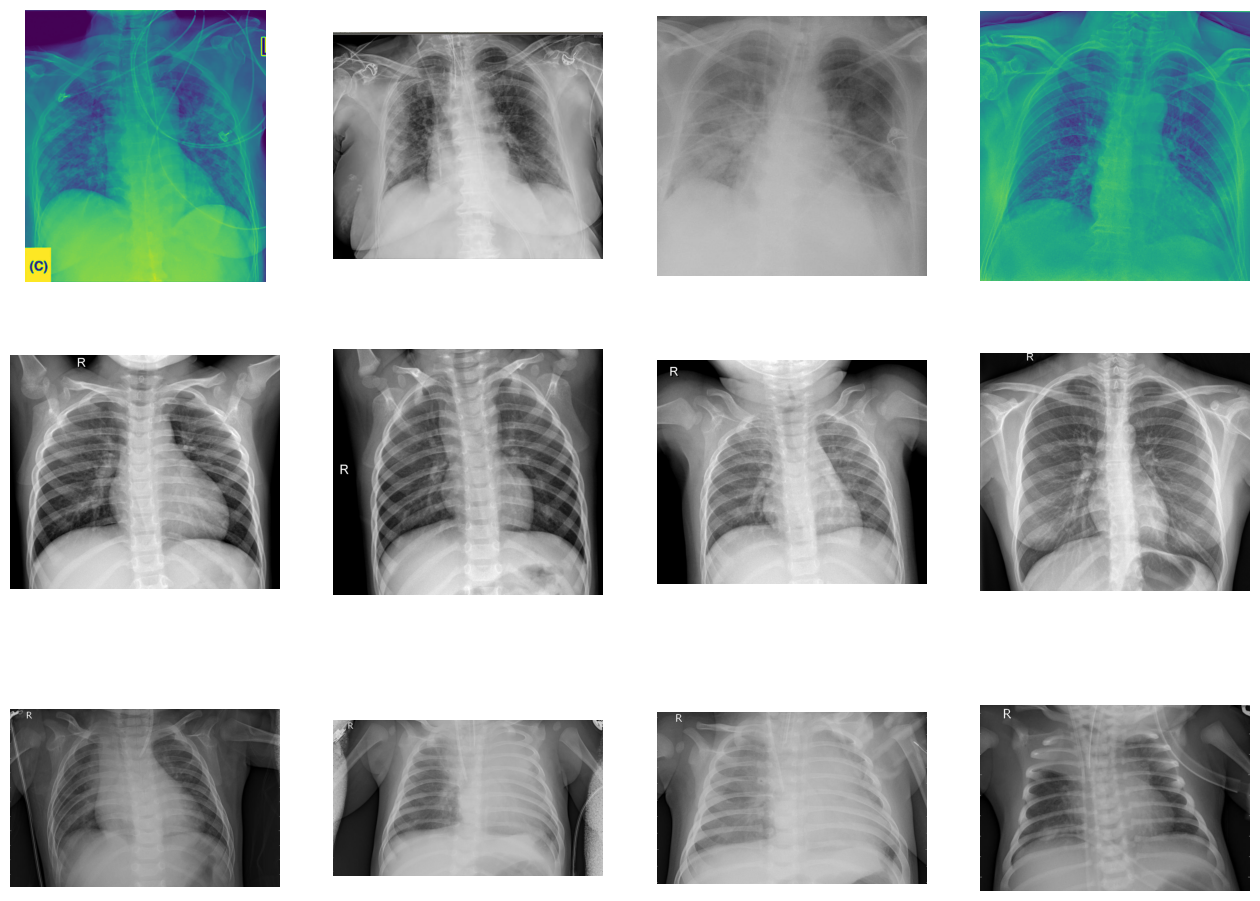

In [ ]:
# Now let's try to visualy inspect these images

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 4

next_covid = [os.path.join(covid_dir, fname)
                for fname in covid_files[pic_index-4:pic_index]]
next_normal = [os.path.join(normal_dir, fname)
                for fname in normal_files[pic_index-4:pic_index]]
next_pneumonia = [os.path.join(pneumonia_dir, fname)
                for fname in pneumonia_files[pic_index-4:pic_index]]

for i, img_path in enumerate(next_covid + next_normal + next_pneumonia):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

# Step 4. Perform Analysis Using Deep Learning Models of your Choice, Present Discussion, and Conclusions

for a first iteration of a model, I'll use 4 convolutioanal layers 64-64-128-128 and Dense layers for classification

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Here we also have some data pre-processing. All pixels values are normalized to be in the range from 0 to 1

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = os.path.join(base_dir, 'train')
training_datagen = ImageDataGenerator(rescale = 1./255)

VALIDATION_DIR = os.path.join(base_dir, 'test')
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=8
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=8
)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
history = model.fit(train_generator, epochs=20, steps_per_epoch=643,
                    validation_data = validation_generator,
                    verbose = 1, validation_steps=161)

Epoch 1/20
643/643 [==============================] - 75s 111ms/step - loss: 0.4963 - accuracy: 0.8169 - val_loss: 0.3620 - val_accuracy: 0.8548
Epoch 2/20
643/643 [==============================] - 70s 110ms/step - loss: 0.2428 - accuracy: 0.9149 - val_loss: 0.5010 - val_accuracy: 0.8618
Epoch 3/20
643/643 [==============================] - 70s 110ms/step - loss: 0.2003 - accuracy: 0.9329 - val_loss: 0.2005 - val_accuracy: 0.9410
Epoch 4/20
643/643 [==============================] - 71s 110ms/step - loss: 0.1805 - accuracy: 0.9374 - val_loss: 0.1308 - val_accuracy: 0.9534
Epoch 5/20
643/643 [==============================] - 69s 108ms/step - loss: 0.1550 - accuracy: 0.9487 - val_loss: 0.1845 - val_accuracy: 0.9433
Epoch 6/20
643/643 [==============================] - 72s 112ms/step - loss: 0.1382 - accuracy: 0.9555 - val_loss: 0.2288 - val_accuracy: 0.9325
Epoch 7/20
643/643 [==============================] - 71s 111ms/step - loss: 0.1341 - accuracy: 0.9582 - val_loss: 0.1934 - val_ac

In [ ]:
# helper function to visualise accuracy and loss functions
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    plt.figure()

    plt.show()

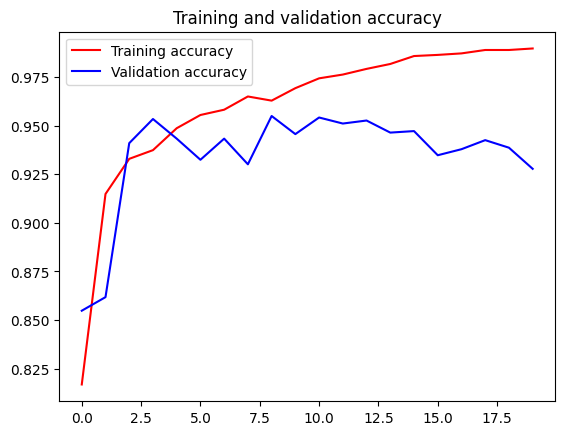

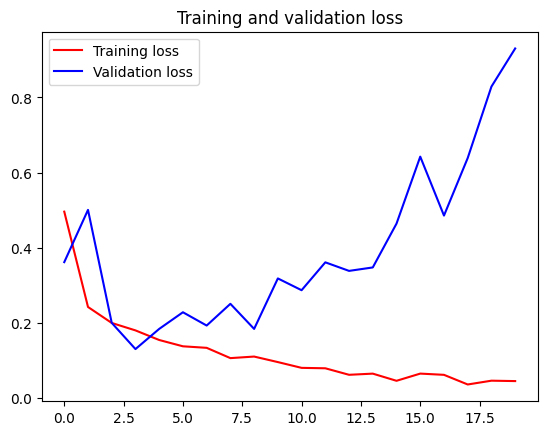

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_history(history)

In [ ]:
model_dropout = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

Epoch 1/20
643/643 [==============================] - 72s 108ms/step - loss: 0.4728 - accuracy: 0.8204 - val_loss: 0.2729 - val_accuracy: 0.8898
Epoch 2/20
643/643 [==============================] - 70s 108ms/step - loss: 0.2654 - accuracy: 0.9042 - val_loss: 0.2526 - val_accuracy: 0.9053
Epoch 3/20
643/643 [==============================] - 69s 107ms/step - loss: 0.2379 - accuracy: 0.9193 - val_loss: 0.1570 - val_accuracy: 0.9394
Epoch 4/20
643/643 [==============================] - 69s 108ms/step - loss: 0.2026 - accuracy: 0.9339 - val_loss: 0.1696 - val_accuracy: 0.9425
Epoch 5/20
643/643 [==============================] - 69s 107ms/step - loss: 0.1937 - accuracy: 0.9362 - val_loss: 0.3524 - val_accuracy: 0.9255
Epoch 6/20
643/643 [==============================] - 68s 106ms/step - loss: 0.2091 - accuracy: 0.9345 - val_loss: 0.1547 - val_accuracy: 0.9511
Epoch 7/20
643/643 [==============================] - 68s 106ms/step - loss: 0.1825 - accuracy: 0.9417 - val_loss: 0.1817 - val_ac

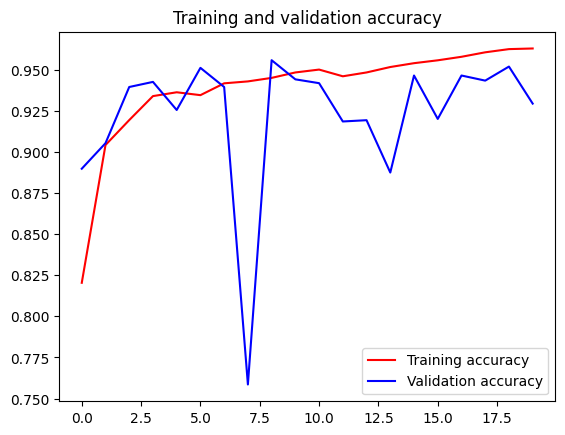

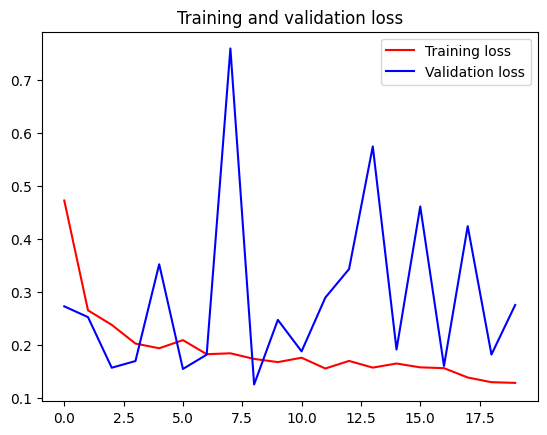

<Figure size 640x480 with 0 Axes>

In [ ]:
model_dropout.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_dropout = model_dropout.fit(train_generator, epochs=20, steps_per_epoch=643,
                    validation_data = validation_generator,
                    verbose = 1, validation_steps=161)
plot_history(history_dropout)

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-01-16 18:08:27--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.207, 108.177.119.207, 108.177.127.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  25.5MB/s    in 3.3s    

2024-01-16 18:08:30 (25.5 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.

pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None)

# Load the pre-trained weights
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d_8[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalizati

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras import Model

x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(3, activation='softmax')(x)

model = Model(pre_trained_model.input, x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d_8[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0][0

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history_transfer_learning = model.fit(
            train_generator,
            epochs=20, steps_per_epoch=643,
            validation_data = validation_generator,
            verbose = 1, validation_steps=161)

Epoch 1/20
643/643 [==============================] - 76s 112ms/step - loss: 0.3961 - accuracy: 0.9170 - val_loss: 0.0910 - val_accuracy: 0.9620
Epoch 2/20
643/643 [==============================] - 69s 108ms/step - loss: 0.1406 - accuracy: 0.9588 - val_loss: 0.1586 - val_accuracy: 0.9495
Epoch 3/20
643/643 [==============================] - 69s 107ms/step - loss: 0.1092 - accuracy: 0.9675 - val_loss: 0.1496 - val_accuracy: 0.9658
Epoch 4/20
643/643 [==============================] - 71s 111ms/step - loss: 0.0991 - accuracy: 0.9728 - val_loss: 0.1167 - val_accuracy: 0.9643
Epoch 5/20
643/643 [==============================] - 71s 110ms/step - loss: 0.0934 - accuracy: 0.9745 - val_loss: 0.2002 - val_accuracy: 0.9589
Epoch 6/20
643/643 [==============================] - 71s 111ms/step - loss: 0.0766 - accuracy: 0.9790 - val_loss: 0.1942 - val_accuracy: 0.9620
Epoch 7/20
643/643 [==============================] - 72s 111ms/step - loss: 0.0660 - accuracy: 0.9811 - val_loss: 0.1861 - val_ac

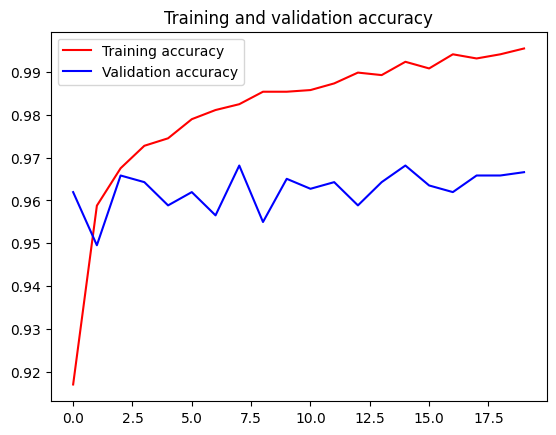

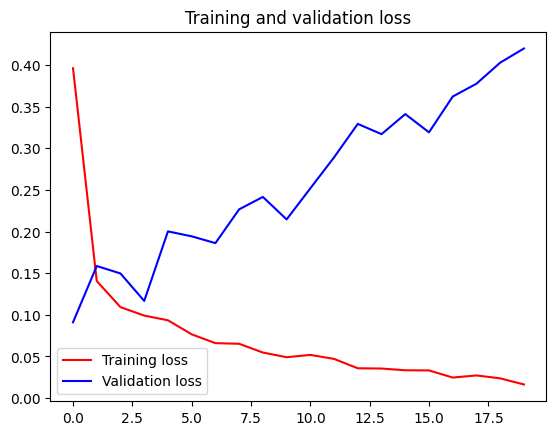

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_history(history_transfer_learning)

# Step 5 Discussion and Conclusion

| Model    | Loss | Accuracy |
| -------- | -----| -------- |
| Base model | 0.9303 | 0.9278 |
| Base model with dropout | 0.2755 | 0.9293 |
| Transfer Learning    | 0.4198 | 0.9666 |

Considering different models I can say that Transfer Learning model gave the best results so far. I guess this model has really great validated architecture and was trained for many epochs on lots of data.
I gues Transfer Learning for common problems like "computer vision" should always be a starting point as it's really hard to get the same architecture and results without having lots of data and computation power.
For some custom problems - custom models with dropout layers can be also good.